## Import

In [31]:
import networkx as nx
import codecs
import random
import matplotlib.pyplot as plt
import operator
import time
from collections import Counter

# Generazione BA Graph

In [4]:

fh=open("network.csv", 'rb')
net = nx.read_edgelist("network.csv",create_using=nx.Graph())
fh.close()
random_number = random.randint(1,len(net.nodes()))
print ("random number:\n"+n)


ba_net = nx.barabasi_albert_graph(len(net.nodes()), random_number)

nx.write_edgelist(ba_net, "ba_net.csv", data=False)

print ("n nodi:")
print (len(ba_net))
print ("n archi:")
print (ba_net.number_of_edges())

random number:
102
n nodi: 
6472
n archi:
649740


# Generazione random graph

In [6]:
random_net = nx.gnm_random_graph(len(net.nodes()), len(net.edges()))

nx.write_edgelist(random_net, "random_net.csv", data=False)

print ("n nodi:")
print (len(random_net))
print ("\nn archi:")
print (random_net.number_of_edges())

n nodi:
6472

n archi:
266378


## Lettura network

In [32]:
fh=open("network.csv", 'rb')
net = nx.read_edgelist("network.csv",create_using=nx.Graph())
fh.close()

e=open("random_net.csv", 'rb')
e_net = nx.read_edgelist("random_net.csv",create_using=nx.Graph())
e.close()

b=open("ba_net.csv", 'rb')
b_net = nx.read_edgelist("ba_net.csv",create_using=nx.Graph())
b.close()


# Degree distribution

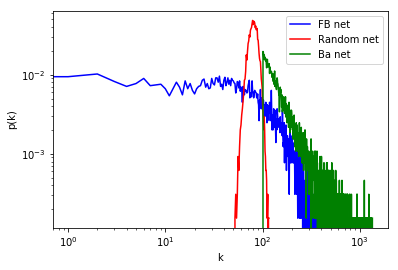

In [21]:


def degree_distribution(net):
	distribution = nx.degree_histogram(net)
	for i, value in enumerate(distribution):
		distribution[i] = (float(value)/float(len(net.nodes())))

	return distribution[1:]


def distributions_plotting(net, random_net, b_net): #, random_net
	distribution_net = degree_distribution(net)
	distribution_random_net = degree_distribution(random_net)
	distribution_ba_net = degree_distribution(b_net)
	plt.loglog(distribution_net, label='FB net', color='b')
	plt.loglog(distribution_random_net, label='Random net', color='r')
	plt.loglog(distribution_ba_net, label='Ba net', color='g')
	plt.legend()
	plt.ylabel('p(k)')
	plt.xlabel('k')
	plt.savefig('degree_distribution.png', format='png')
	plt.show()
	plt.close()





distributions_plotting(net, e_net, b_net)


## Connected components

In [16]:
print("Connected components: ")
print("Original network: "+str(nx.number_connected_components(net)))
print("ER network: " +str(nx.number_connected_components(e_net)))
print("BA network: " +str(nx.number_connected_components(b_net)))

Connected components: 
Original network: 1
ER network: 1
BA network: 1


## Average Shortest Paths

In [8]:
print("Average shortest paths:\n")


net_path = nx.average_shortest_path_length(net)

print("Real network: "+str(net_path))

er_path = nx.average_shortest_path_length(e_net)

print("ER network: "+str(er_path))

ba_path = nx.average_shortest_path_length(b_net)

print("BA network:" +str(ba_path))

Average shortest paths:

Real network: 2.60508718273159
ER network: 2.3337271699408544
BA network: 1.9782535526478409


## Clustering coefficients

In [36]:
net_cc = nx.average_clustering(net)
print('FB network average cluster coefficient: ' + str(net_cc) + '\n')
e_net_cc = nx.average_clustering(e_net)
print('Random network average cluster coefficient: ' + str(e_net_cc) + '\n')
ba_net_cc = nx.average_clustering(b_net)
print('Barabasi Albert network average cluster coefficient: ' + str(ba_net_cc) + '\n')

FB network average cluster coefficient: 0.2536135569835697

Random network average cluster coefficient: 0.012708472729686632

Barabasi Albert network average cluster coefficient: 0.07904584337205917



# Densità

In [12]:
print("Densities: ")

net_cc = nx.density(net)
print("Original network: "+str(net_cc))
e_net_cc = nx.density(e_net)
print("ER network: "+str(e_net_cc))
ba_net_cc = nx.density(b_net)
print("BA network: "+str(ba_net_cc))



Densities: 
Original network: 0.012720917647413897
ER network: 0.012720917647413897
BA network: 0.031028422137829345


## Degree Centrality

In [33]:
net_dc = nx.degree_centrality(net)

e_net_dc = nx.degree_centrality(e_net)

b_net_dc = nx.degree_centrality(b_net)


net_dc = sorted(net_dc.items(), key=operator.itemgetter(1))
net_dc = [i[1] for i in net_dc]


e_net_dc = sorted(e_net_dc.items(), key=operator.itemgetter(1))
e_net_dc = [i[1] for i in e_net_dc]


b_net_dc = sorted(b_net_dc.items(), key=operator.itemgetter(1))
b_net_dc = [i[1] for i in b_net_dc]




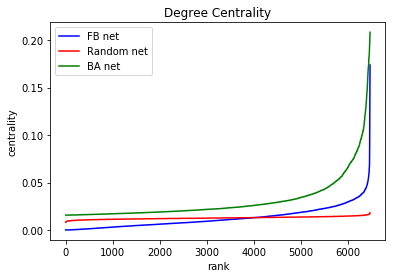

In [34]:
plt.plot(net_dc, label='FB net', color='b')
plt.plot(e_net_dc, label='Random net', color='r')
plt.plot(b_net_dc, label='BA net', color='g')
plt.legend()
plt.title('Degree Centrality')
plt.ylabel('centrality')
plt.xlabel('rank')
plt.savefig('degree_centrality.png', format='png')
plt.show()
plt.close()


## Closeness Centrality

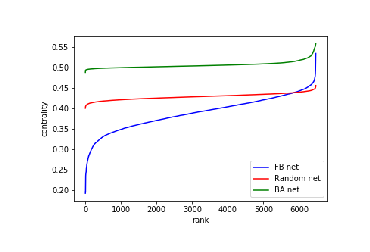

"net_cl = nx.closeness_centrality(net)\n\ne_net_cl = nx.closeness_centrality(e_net)\n\nb_net_cl = nx.closeness_centrality(b_net)\n\n\nnet_cl = sorted(net_cl.items(), key=operator.itemgetter(1))\nnet_cl = [i[1] for i in net_cl]\n\ne_net_cl = sorted(e_net_cl.items(), key=operator.itemgetter(1))\ne_net_cl = [i[1] for i in e_net_cl]\n\n\nb_net_cl = sorted(b_net_cl.items(), key=operator.itemgetter(1))\nb_net_cl = [i[1] for i in b_net_cl]\n\n\nplt.plot(net_cl, label='FB net', color='b')\nplt.plot(e_net_cl, label='Random net', color='r')\nplt.plot(b_net_cl, label='BA net', color='g')\nplt.legend()\nplt.ylabel('centrality')\nplt.xlabel('rank')\nplt.savefig('closeness_centrality.png', format='png')\nplt.show()\nplt.close()"

In [29]:
net_cl = nx.closeness_centrality(net)

e_net_cl = nx.closeness_centrality(e_net)

b_net_cl = nx.closeness_centrality(b_net)


net_cl = sorted(net_cl.items(), key=operator.itemgetter(1))
net_cl = [i[1] for i in net_cl]

e_net_cl = sorted(e_net_cl.items(), key=operator.itemgetter(1))
e_net_cl = [i[1] for i in e_net_cl]


b_net_cl = sorted(b_net_cl.items(), key=operator.itemgetter(1))
b_net_cl = [i[1] for i in b_net_cl]


plt.plot(net_cl, label='FB net', color='b')
plt.plot(e_net_cl, label='Random net', color='r')
plt.plot(b_net_cl, label='BA net', color='g')
plt.legend()
plt.ylabel('centrality')
plt.xlabel('rank')
plt.savefig('closeness_centrality.png', format='png')
plt.show()
plt.close()



## Betweenness Centrality

In [ ]:
net_bc = nx.betweenness_centrality(net)
e_net_bc = nx.betweenness_centrality(e_net)
b_net_bc = nx.betweenness_centrality(b_net)

net_bc = sorted(net_bc.items(), key=operator.itemgetter(1))
net_bc = [i[1] for i in net_bc]


e_net_bc = sorted(e_net_bc.items(), key=operator.itemgetter(1))
e_net_bc = [i[1] for i in e_net_bc]

b_net_bc = sorted(b_net_bc.items(), key=operator.itemgetter(1))
b_net_bc = [i[1] for i in b_net_bc]


plt.plot(net_bc, label='FB net', color='b')
plt.plot(e_net_bc, label='Random net', color='r')
plt.plot(b_net_bc, label='Random net', color='g')
plt.legend()
plt.ylabel('centrality')
plt.xlabel('rank')
plt.savefig('betweenness_centrality.png', format='png')
plt.show()
plt.close()

In [ ]:
Clustering Coefficients